In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import os
import matplotlib.pyplot as plt
import imageio.v2 as imageio

In [3]:
# read bus stops geojson
bus_stops = gpd.read_file('data/Bus_Stops.geojson')
bus_stops = bus_stops.to_crs(epsg=4326)
bus_stops = bus_stops.dropna(subset=['geometry'])
# drop DATE_UPDATED
bus_stops = bus_stops.drop(columns=['DATE_UPDATED'])
bus_stops.head()

,OBJECTID,STOP_NAME,STOP_CODE,COUNTDOWN_SIGN,NAPTAN_ATCO,ROAD_NAME,POINT_LETTER,ROUTES,LIVE_BUS_ARRIVAL,OS_EASTING,OS_NORTHING,POSTCODE,geometry
0,627,Northumberland Park Bus Stand,BP4641,None,None,NORTHUMBERLAND PARK,None,None,https://tfl.gov.uk/bus/stop//,534761,191137,N17 0LB,POINT (-0.05554 51.60296)
1,780,Hyde Park Corner,BP4661,None,None,PICCADILLY,None,None,https://tfl.gov.uk/bus/stop//,528623,179941,W1J 9DZ,POINT (-0.14820 51.50378)
2,2401,Hampton Court Station,BP5447,None,None,HAMPTON COURT STATION FORECOURT,AP,None,https://tfl.gov.uk/bus/stop//,515372,168407,KT8 9AE,POINT (-0.34279 51.40297)
3,2951,Birkbeck,TRS162,None,9400ZZCRBIR1,HARRINGTON ROAD - BIRKBECK,None,T2,https://tfl.gov.uk/bus/stop/9400ZZCRBIR1/,535302,168966,SE20 7YA,POINT (-0.05623 51.40359)
4,3016,Avenue Road,TRS164,None,9400ZZCRAVE1,AVENUE ROAD,None,T2,https://tfl.gov.uk/bus/stop/9400ZZCRAVE1/,535744,169323,BR3 4SB,POINT (-0.04974 51.40669)


In [4]:
# import bus data
file = os.path.join('data', 'numbat','busto_outputs','FOI-0097-2425.CSV')
bus_entex = pd.read_csv(file)

FUNCTION TO FILTER BUS DATA BY DATE

In [5]:
bus_entex.head()

,traveldate,stop_id,stop_name,route_id,n_boarders,n_alighters
0,20231001,1000,Westminster Stn / Parliament Square,12,132,127
1,20231001,1000,Westminster Stn / Parliament Square,159,198,38
2,20231001,1000,Westminster Stn / Parliament Square,453,184,129
3,20231001,1000,Westminster Stn / Parliament Square,N109,5,1
4,20231001,1000,Westminster Stn / Parliament Square,N12,5,1


In [6]:
# function filter bus data by date, average 
def bus_entex_by_day(date):
    
    wk_dict = {'mon': [20231002, 20231009, 20231016, 20231023, 20231030],
               'tue': [20231003, 20231010, 20231017, 20231024, 20231031],
               'wed': [20231004, 20231011, 20231018, 20231025],
               'thu': [20231005, 20231012, 20231019, 20231026], 
               'fri': [20231006, 20231013, 20231020, 20231027],
               'sat': [20231007, 20231014, 20231021, 20231028],
               'sun': [20231001, 20231008, 20231015, 20231022, 20231029]
    }

    df = bus_entex[bus_entex['traveldate'].isin(wk_dict[date])]
    # group by stop_id, stop_name, route_id
    df = df.groupby(['stop_id', 'stop_name', 'route_id']).mean().reset_index().drop(columns=['traveldate'])
    
    # Merge with bus stops
    df_merge = df.merge(bus_stops, left_on='stop_id', right_on='STOP_CODE')
    df_merge = gpd.GeoDataFrame(df_merge, geometry='geometry') # geo data frame
    df_merge = df_merge.to_crs(epsg=4326) # change crs to 4326
    df_merge = df_merge.drop(columns=['STOP_CODE', 'STOP_NAME'])
        
    return df_merge

bus_entex_by_day('sat').head()


,stop_id,stop_name,route_id,n_boarders,n_alighters,OBJECTID,COUNTDOWN_SIGN,NAPTAN_ATCO,ROAD_NAME,POINT_LETTER,ROUTES,LIVE_BUS_ARRIVAL,OS_EASTING,OS_NORTHING,POSTCODE,geometry
0,1000,Westminster Stn / Parliament Square,12,75.25,38.75,4725618,None,490000266G,PARLIAMENT STREET,G,"12, 159, 453, N53, N109, N155, N381",https://tfl.gov.uk/bus/stop/490000266G/,530171,179738,SW1A 2JR,POINT (-0.12599 51.50160)
1,1000,Westminster Stn / Parliament Square,159,107.50,58.25,4725618,None,490000266G,PARLIAMENT STREET,G,"12, 159, 453, N53, N109, N155, N381",https://tfl.gov.uk/bus/stop/490000266G/,530171,179738,SW1A 2JR,POINT (-0.12599 51.50160)
2,1000,Westminster Stn / Parliament Square,35,1.00,1.00,4725618,None,490000266G,PARLIAMENT STREET,G,"12, 159, 453, N53, N109, N155, N381",https://tfl.gov.uk/bus/stop/490000266G/,530171,179738,SW1A 2JR,POINT (-0.12599 51.50160)
3,1000,Westminster Stn / Parliament Square,453,153.75,88.75,4725618,None,490000266G,PARLIAMENT STREET,G,"12, 159, 453, N53, N109, N155, N381",https://tfl.gov.uk/bus/stop/490000266G/,530171,179738,SW1A 2JR,POINT (-0.12599 51.50160)
4,1000,Westminster Stn / Parliament Square,N109,12.25,1.00,4725618,None,490000266G,PARLIAMENT STREET,G,"12, 159, 453, N53, N109, N155, N381",https://tfl.gov.uk/bus/stop/490000266G/,530171,179738,SW1A 2JR,POINT (-0.12599 51.50160)


FUNCTION TO PLOT SINGLE DAY + GIF

In [7]:
# # plot
# list_day = ['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun']
# # shared bounding box for the map
# x_lim = [np.inf, -np.inf]
# y_lim = [np.inf, -np.inf]
# for day in list_day:
#     df_plot = bus_entex_by_day(bus_entex, day)
#     x_lim[0] = min(x_lim[0],df_plot.geometry.x.min())
#     x_lim[1] = max(x_lim[1],df_plot.geometry.x.max())
#     y_lim[0] = min(y_lim[0],df_plot.geometry.y.min())
#     y_lim[1] = max(y_lim[1],df_plot.geometry.y.max())

In [8]:
# # gif for bus boarders
# images = []
# for day in list_day:
#     df_plot = bus_entex_by_day(day)
#     ax = df_plot.plot(column='route_id',markersize=df_plot['n_boarders']/10,figsize=(20,20))
#     ax.set_title('Bus alighters on ' + day)
#     ax.set_axis_off()
#     ax.set_xlim(x_lim)
#     ax.set_ylim(y_lim)
#     plt.tight_layout()
#     plt.savefig('temp.png')
#     images.append(imageio.imread('temp.png'))
#     os.remove('temp.png')
# imageio.mimsave(os.path.join('output','bus_alighters.gif'), images, duration=500, loop=0)

# # gif for bus boarders
# images = []
# for day in list_day:
#     df_plot = bus_entex_by_day(day)
#     ax = df_plot.plot(column='route_id',markersize=df_plot['n_boarders']/10,figsize=(20,20))
#     ax.set_title('Bus boarders on ' + day)
#     ax.set_axis_off()
#     ax.set_xlim(x_lim)
#     ax.set_ylim(y_lim)
#     plt.tight_layout()
#     plt.savefig('temp.png')
#     images.append(imageio.imread('temp.png'))
#     os.remove('temp.png')
# imageio.mimsave(os.path.join('output','bus_boarders.gif'), images, duration=500, loop=0)

FUNCTION TO PLOT SINGLE ROUTE

In [9]:
# define function to plot according to route_id
def plot_route(day,route_id):
    
    route_id = str(route_id)    #convert route_id to string#
    day = str(day).lower() # convert day to lower case
    bus_entex_day = bus_entex_by_day(day) # filter data by day

    df_plot = bus_entex_day[bus_entex_day.route_id==route_id] # filter data for the route_id
    
    # import london boroughs
    boroughs = gpd.read_file(os.path.join('data','statistical-gis-boundaries-london','ESRI','London_Borough_Excluding_MHW.shp'))
    boroughs = boroughs.to_crs(epsg=4326) # change crs to 4326                   

    # plot
    # get minmax values for colorbar, min of both n_boarders and n_alighters
    vmin = df_plot[['n_boarders','n_alighters']].min().min()
    vmax = df_plot[['n_boarders','n_alighters']].max().max()

    # cmap
    cmap = plt.cm.viridis
    fig,ax = plt.subplots(2,1,figsize=(15,20))

    df_plot.plot(ax=ax[0], cmap=cmap, column='n_boarders',markersize=df_plot['n_boarders']/10, vmin=vmin, vmax=vmax,label='STOP_NAME')
    boroughs.boundary.plot(ax=ax[0], color='grey', linewidth=0.3)
    ax[0].set_title('Route {} - Boarders'.format(route_id))
    ax[0].set_axis_off()

    df_plot.plot(ax=ax[1], cmap=cmap, column='n_alighters', markersize=df_plot['n_alighters']/10, vmin=vmin, vmax=vmax,label='STOP_NAME')
    boroughs.boundary.plot(ax=ax[1], color='grey', linewidth=0.3)
    ax[1].set_title('Route {} - Alighters'.format(route_id))
    ax[1].set_axis_off()

    # shared legend for both axes
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', pad=0.01, aspect=50)
    cbar.set_label('Number of passengers')

    plt.show()
    
    return

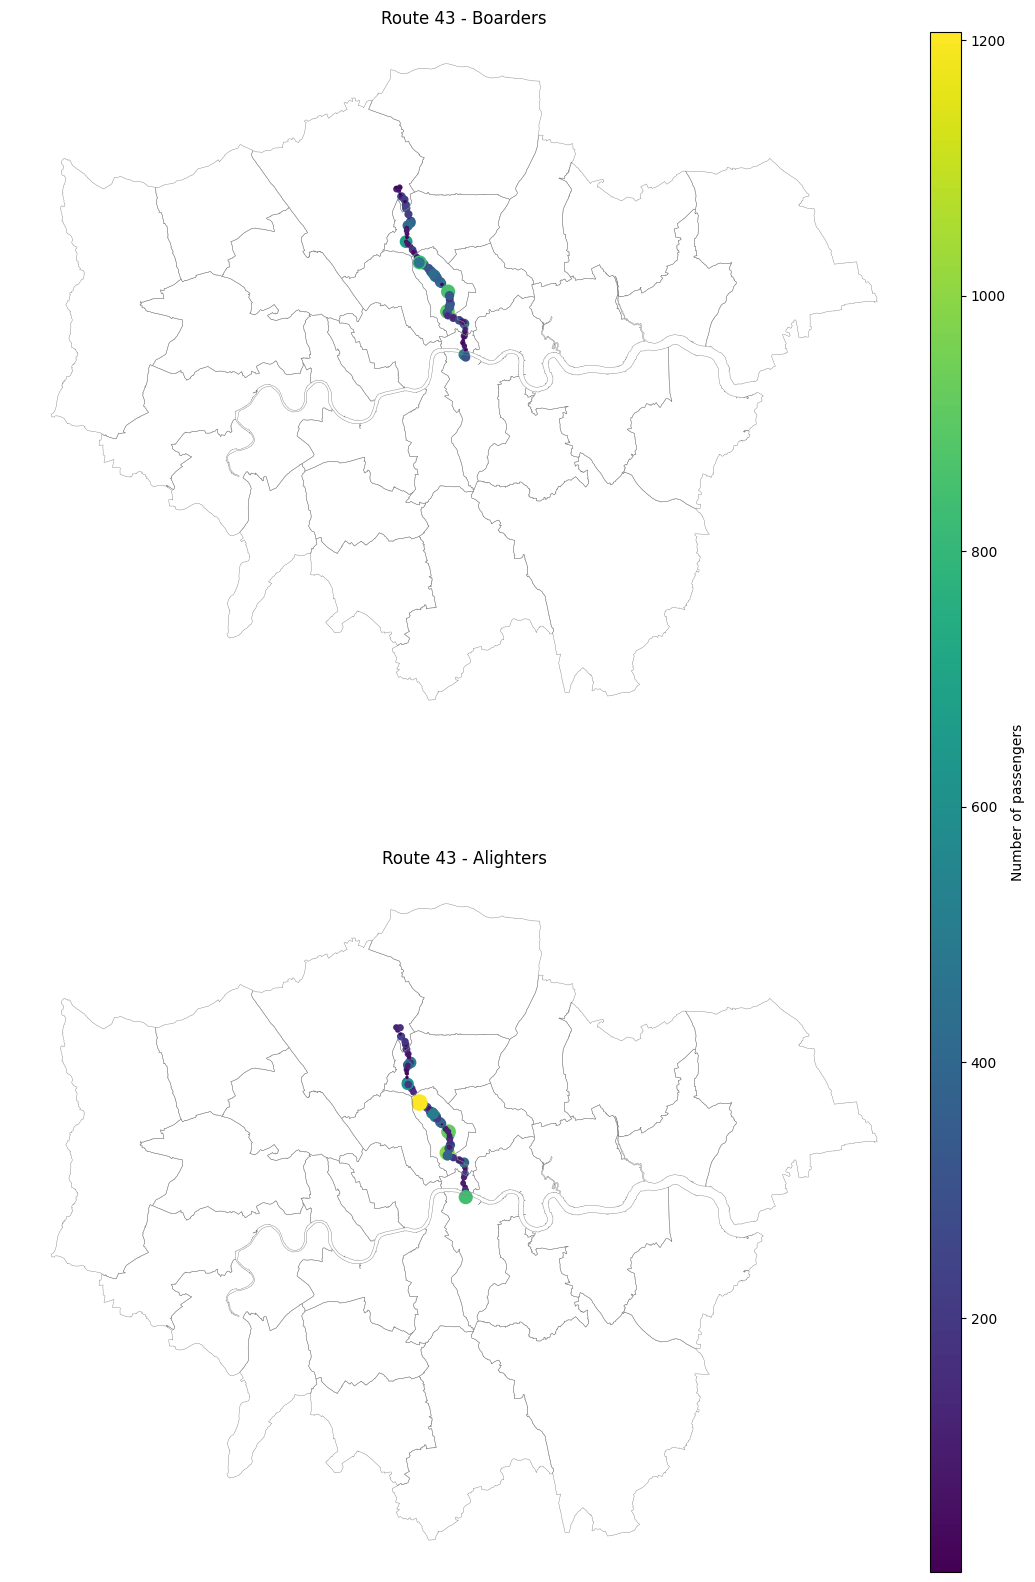

In [10]:
plot_route('sat',43)

In [11]:
# data set for sat
bus_flow_sat = bus_entex_by_day('sat')

Text(0.5, 1.0, 'Total Exit flow - TfL Bus')

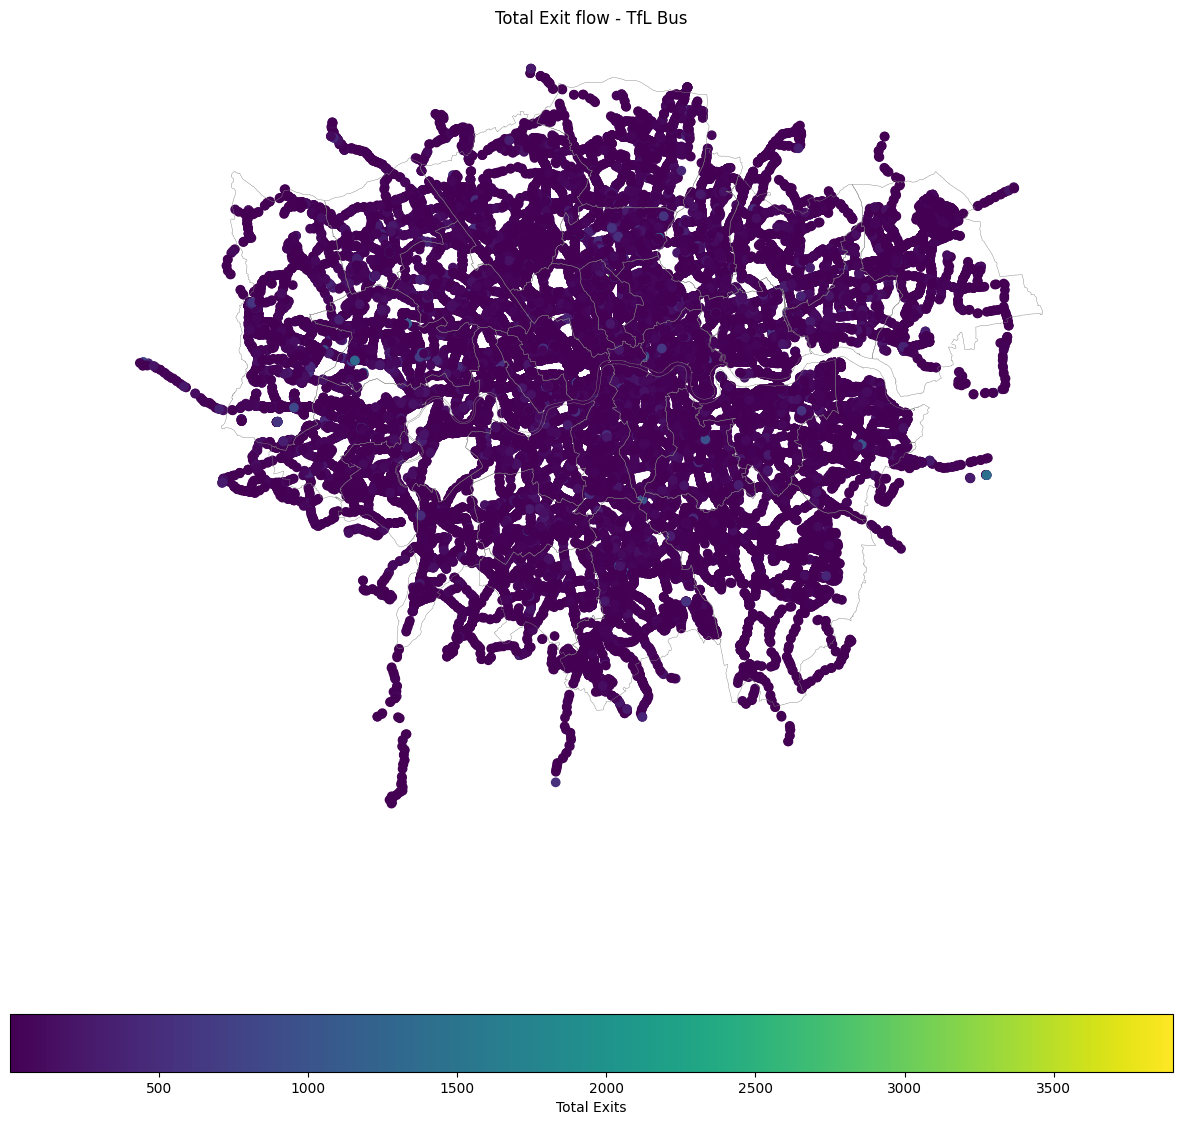

In [13]:
boroughs = gpd.read_file(os.path.join('data','statistical-gis-boundaries-london','ESRI','London_Borough_Excluding_MHW.shp'))
boroughs = boroughs.to_crs(epsg=4326) # change crs to 4326 

# plot based on Total alighters
fig,ax = plt.subplots(1,1,figsize=(15,15))
bus_flow_sat.plot(column='n_alighters',ax=ax,legend=True,legend_kwds={'label': "Total Exits",'orientation': "horizontal"})
boroughs.boundary.plot(ax=ax, color='grey', linewidth=0.3)
ax.set_axis_off()
plt.title('Total Exit flow - TfL Bus')

In [16]:
# export to geojson
bus_flow_sat.to_file('data/cleaned/flow_bus.geojson', driver='GeoJSON')

CREATE ISOCHRONE

In [ ]:
bus_entex_by_day_buffer = bus_entex_by_day(bus_entex, 'sat').copy()
bus_entex_by_day_buffer.to_crs(epsg=27700, inplace=True)
bus_entex_by_day_buffer['geometry'] = bus_entex_by_day_buffer.buffer(500)
bus_entex_by_day_buffer.explore()